# Multiple outputs NN with functional API

In [40]:
# Importing the libraries
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

Helper functions

In [54]:
#function that retrieves the input variable columns from the CSV and returns a pandas dataframe containing the columns
def retrieve_X_df(df, verbose=True):
  """
  :param df: Required, the dataframe containing the input and output variables. The first 900 values for each observation are assumed the input variables.
  :param verbose: Optional, default==True, prints the shape of the dataframe after retrieving the input columns.

  :return: dataframe containing the input data. 
  """
  df = df.iloc[:,0:900]
  if verbose:
    print("df shape: ", df.shape)
  return df

#function that retrieves the target columns from the CSV and returns a pandas dataframe containing the columns
def retrieve_y_df(df, n_last_cols = 3, verbose=True):
  """
  :param df: Required, the dataframe containing the input and target variables. 
  :param n_last_cols: Optional, default==3, The number of column values for each observation that are the target variables.
  :param verbose: Optional, default==True, prints the shape of the dataframe after retrieving the target columns.

  :return: dataframe containing the target data. 
  """
  df = df.iloc[:,-n_last_cols:]
  df.columns = ['amplitude','X','Y']
  if verbose:
    print("df shape: ", df.shape)
  return df

#function that gets the 3 arrays from the dataframe
def format_output(df):
    """
    :param df: Required, the dataframe containing the target variables. 
    
    :return: 3 numpy arrays with the target data. 
    """
    y1 = df[:, 0]
    y1 = np.array(y1)
    y2 = df[:, 1]
    y2 = np.array(y2)
    y3 = df[:, 2]
    y3 = np.array(y3)
    return y1, y2, y3

Read csv-files and retrieve the train, test and judge datasets. 
Split train dataset into train and validation datasets with ratio 90%

In [41]:
source = "https://userweb.jlab.org/~tbritton/Hackathon2021_DataSets/Problem1/"

#Read csv file with train data
df_train = pd.read_csv(os.path.join(source,"train.csv"), na_values=['NA', '?'], header=None)

#Split train data into train (90%) and validation datasets (10%)
train_pct = 0.9
train_cut = int(len(df_train) * train_pct)

#Get train dataframes for X and Y and transform them to numpy arrays
df_tr = df_train[0:train_cut]
df_train_X = retrieve_X_df(df_tr)
df_tr_y = retrieve_y_df(df_tr).to_numpy()
df_train_y = format_output(df_tr_y)#3 separate arrays for each output

#Get validation dataframes for X and Y and transform them to numpy arrays
df_val = df_train[train_cut:]
df_val_X = retrieve_X_df(df_val)
df_v_y = retrieve_y_df(df_val).to_numpy()
df_val_y = format_output(df_v_y)#3 separate arrays for each output

#Read csv file with test data
df_test = pd.read_csv(os.path.join(source,"test.csv"), na_values=['NA', '?'], header=None)

#Get train dataframes for X and Y and transform them to numpy arrays
df_test_X = retrieve_X_df(df_test)
df_t_y = retrieve_y_df(df_test).to_numpy()
df_test_y = format_output(df_t_y)#3 separate arrays for each output

#Read csv file with judge data
df_judge = pd.read_csv(os.path.join(source,"judge.csv"), na_values=['NA', '?'], header=None)
df_judge_X = retrieve_X_df(df_judge)

df_judge_X

df shape:  (9000, 900)
df shape:  (9000, 3)
df shape:  (1000, 900)
df shape:  (1000, 3)
df shape:  (2000, 900)
df shape:  (2000, 3)
df shape:  (2000, 900)


,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transform the train and validation inputs into the numpy arrays

In [8]:
train_X = np.array(df_train_X)
print(train_X.shape)
val_X = np.array(df_val_X)
print(val_X.shape)

(9000, 900)
(1000, 900)


Build the model with functional API

In [55]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=900,)
    first_dense = Dense(units='128', activation='relu')(input_layer)
    
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='amplitude')(first_dense)

    second_dense = Dense(units='128', activation='relu')(first_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1', name='coord_X')(second_dense)

    third_dense = Dense(units='128', activation='relu')(second_dense)
    
    # Y3 output will be fed from the third dense
    y3_output = Dense(units='1', name='coord_Y')(third_dense)
    
    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output])

    return model

Create and compile the model

In [22]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for each output
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss={'amplitude': 'mse', 
                    'coord_X': 'mse', 
                    'coord_Y': 'mse'},
              metrics={'amplitude': tf.keras.metrics.RootMeanSquaredError(),
                       'coord_X': tf.keras.metrics.RootMeanSquaredError(),
                       'coord_Y': tf.keras.metrics.RootMeanSquaredError()})

Train the model for 100 epochs

In [23]:
history = model.fit(train_X, df_train_y,
                    epochs=100, batch_size=10, validation_data=(df_val_X, df_val_y))

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 1s 161us/sample - loss: 119109.2785 - amplitude_loss: 2.1646 - coord_X_loss: 79818.9062 - coord_Y_loss: 39288.3516 - amplitude_root_mean_squared_error: 1.4713 - coord_X_root_mean_squared_error: 282.5223 - coord_Y_root_mean_squared_error: 198.2130 - val_loss: 32174.1465 - val_amplitude_loss: 1.3236 - val_coord_X_loss: 24928.3320 - val_coord_Y_loss: 7244.4907 - val_amplitude_root_mean_squared_error: 1.1505 - val_coord_X_root_mean_squared_error: 157.8871 - val_coord_Y_root_mean_squared_error: 85.1146
Epoch 2/100
9000/9000 [==============================] - 1s 131us/sample - loss: 27876.6408 - amplitude_loss: 1.0246 - coord_X_loss: 22271.7852 - coord_Y_loss: 5603.8252 - amplitude_root_mean_squared_error: 1.0122 - coord_X_root_mean_squared_error: 149.2373 - coord_Y_root_mean_squared_error: 74.8587 - val_loss: 19332.5374 - val_amplitude_loss: 0.7747 - val_coord_X_loss: 16913.5605 - val_co

Test the model and print loss and rmse for each output

In [25]:
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse  = model.evaluate(x = df_val_X, y = df_val_y)

print()
print(f'loss: {loss}')

print(f'amp_loss: {Y1_loss}')
print(f'X_loss: {Y2_loss}')
print(f'Y_loss: {Y3_loss}')

print(f'amp_rmse: {Y1_rmse}')
print(f'X_rmse: {Y2_rmse}')
print(f'Y_rmse: {Y3_rmse}')

1000/1000 [==============================] - 0s 24us/sample - loss: 301.7947 - amplitude_loss: 0.1015 - coord_X_loss: 193.5195 - coord_Y_loss: 156.3393 - amplitude_root_mean_squared_error: 0.3186 - coord_X_root_mean_squared_error: 13.7835 - coord_Y_root_mean_squared_error: 10.5692

loss: 301.7947414550781
amp_loss: 0.10145990550518036
X_loss: 193.51953125
Y_loss: 156.3392791748047
amp_rmse: 0.3186219334602356
X_rmse: 13.783487319946289
Y_rmse: 10.569231986999512


Helper functions for building plots

In [26]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

Predict the outputs fot the test dataset and biuld the plots to visualize results

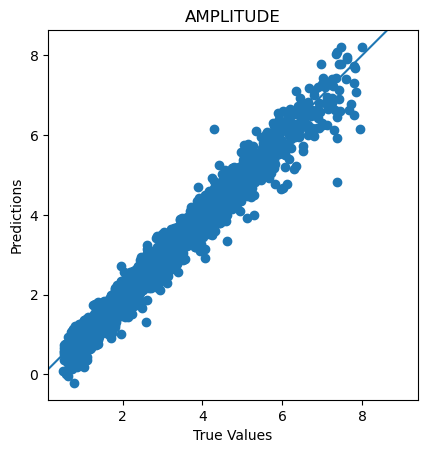

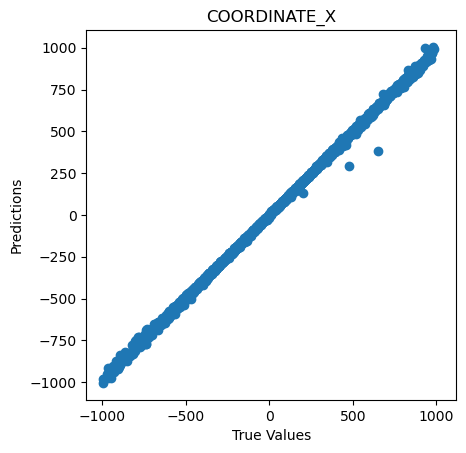

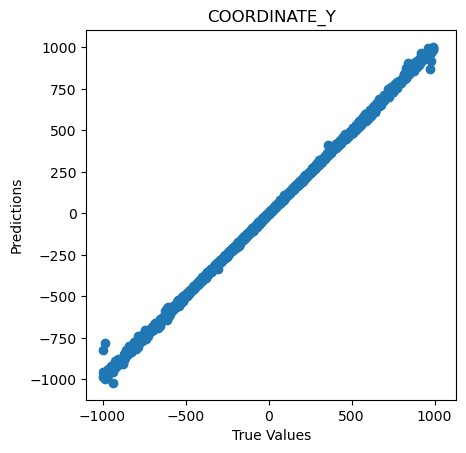

In [27]:
Y_pred = model.predict(df_test_X)

amp_pred = Y_pred[0]
coord_X_pred = Y_pred[1]
coord_Y_pred = Y_pred[2]

plot_diff(df_test_y[0], amp_pred, title='AMPLITUDE')
plot_diff(df_test_y[1], coord_X_pred, title='COORDINATE_X')
plot_diff(df_test_y[2], coord_Y_pred, title='COORDINATE_Y')

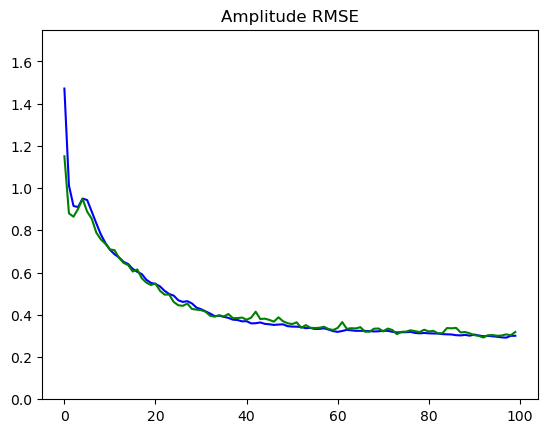

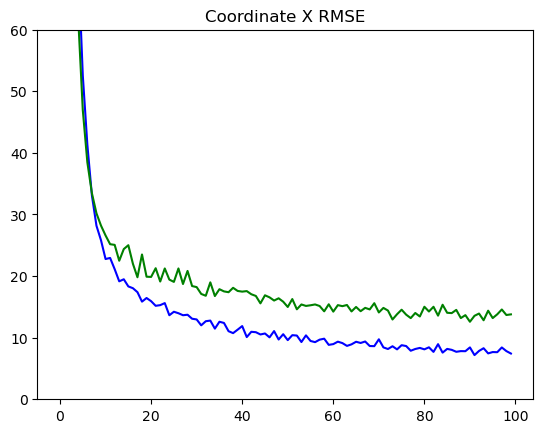

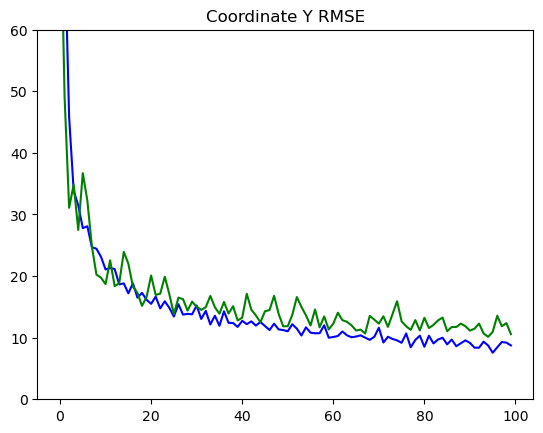

In [39]:
# Plot RMSE
plot_metrics(metric_name='amplitude_root_mean_squared_error', title='Amplitude RMSE', ylim=1.75)
plot_metrics(metric_name='coord_X_root_mean_squared_error', title='Coordinate X RMSE', ylim=60)
plot_metrics(metric_name='coord_Y_root_mean_squared_error', title='Coordinate Y RMSE', ylim=60)

Predict outputs for judge data and create a dataframe with results

In [52]:
judge_predictions = model.predict(df_judge_X)

amp_pred = judge_predictions[0]
coord_X_pred = judge_predictions[1]
coord_Y_pred = judge_predictions[2]

output_judge = pd.DataFrame({'amplitude':amp_pred.flatten(), 'X':coord_X_pred.flatten(),'Y':coord_Y_pred.flatten()})
output_judge

,amplitude,X,Y
0,3.776049,286.604523,-79.535728
1,0.255513,203.767838,-824.392517
2,2.450529,-35.189953,25.657576
3,1.748884,554.403137,-192.849564
4,3.834386,-282.510345,-364.280304
...,...,...,...
1995,0.383825,-992.262146,386.812378
1996,5.058572,311.958069,-242.305527
1997,0.291929,276.632355,-32.820583
1998,4.944913,-438.278931,132.765823


Create the csv-file with outputs

In [53]:
path = "C:/Users/matsiuk/Documents/Python Scripts/DATA/Problem1"
output_judge.to_csv(os.path.join(path,"output_judge_Pr1_multioutput_model.csv"),index=False,header=False)